In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Review Our Data 
My use the data you can find it here:
https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv
This data shows the students study ours vs their score
I use linear regression to can use to perdict new student 

In [9]:
data=[
    (2.5,21),(5.1,47),(3.2,27),(8.5,75),(3.5,30),
    (1.5,20),(9.2,88),(5.5,60),(8.3,81),(2.7,25),
    (7.7,85),(5.9,62),(4.5,41),(3.3,42),(1.1,17),
    (8.9,95),(2.5,30),(1.9,24),(6.1,67),(7.4,69),
    (2.7,30),(4.8,54),(3.8,35),(6.9,76),(7.8,86)
    ]

Here we split the data into two parts 

In [61]:
Hours=[i[0] for i in data]
Score=[i[1] for i in data]

[2.5,
 5.1,
 3.2,
 8.5,
 3.5,
 1.5,
 9.2,
 5.5,
 8.3,
 2.7,
 7.7,
 5.9,
 4.5,
 3.3,
 1.1,
 8.9,
 2.5,
 1.9,
 6.1,
 7.4,
 2.7,
 4.8,
 3.8,
 6.9,
 7.8]

Plot the data Hours Vs Score

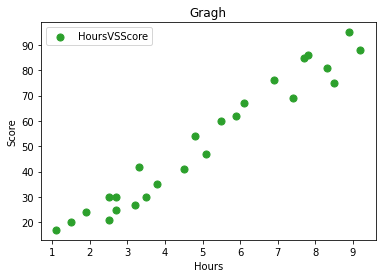

In [32]:
plt.scatter(Hours,Score,label="HoursVSScore",marker='o',c='#2ca02c',s=50)
plt.xlabel("Hours")
plt.ylabel("Score")
plt.title("Gragh")
plt.legend()

In [49]:
score_for_Hist=np.array(Score)
score_for_Hist=score_for_Hist/score_for_Hist.max()

array([0.22105263, 0.49473684, 0.28421053, 0.78947368, 0.31578947,
       0.21052632, 0.92631579, 0.63157895, 0.85263158, 0.26315789,
       0.89473684, 0.65263158, 0.43157895, 0.44210526, 0.17894737,
       1.        , 0.31578947, 0.25263158, 0.70526316, 0.72631579,
       0.31578947, 0.56842105, 0.36842105, 0.8       , 0.90526316])

In [53]:
Hours_for_Hist=np.array(Hours)
Hours_for_Hist/=Hours_for_Hist.max()

array([0.27173913, 0.55434783, 0.34782609, 0.92391304, 0.38043478,
       0.16304348, 1.        , 0.59782609, 0.90217391, 0.29347826,
       0.83695652, 0.64130435, 0.48913043, 0.35869565, 0.11956522,
       0.9673913 , 0.27173913, 0.20652174, 0.66304348, 0.80434783,
       0.29347826, 0.52173913, 0.41304348, 0.75      , 0.84782609])

(array([3., 4., 3., 1., 3., 2., 1., 2., 3., 3.]),
 array([0.11956522, 0.2076087 , 0.29565217, 0.38369565, 0.47173913,
        0.55978261, 0.64782609, 0.73586957, 0.82391304, 0.91195652,
        1.        ]),
 <BarContainer object of 10 artists>)

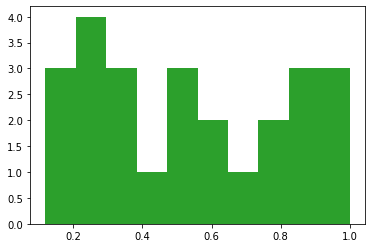

In [56]:
fig1=plt.figure()
plt.hist(Hours_for_Hist,color='#2ca02c',label="Hours")

(array([4., 5., 1., 3., 1., 2., 2., 2., 3., 2.]),
 array([0.17894737, 0.26105263, 0.34315789, 0.42526316, 0.50736842,
        0.58947368, 0.67157895, 0.75368421, 0.83578947, 0.91789474,
        1.        ]),
 <BarContainer object of 10 artists>)

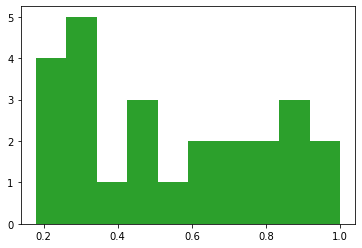

In [55]:
fig2=plt.figure()
plt.hist(score_for_Hist,color='#2ca02c',label="Score")

# Method-1 (Normal Equation)

In [74]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(Hours, Score, test_size=0.2, random_state=0) 

In [135]:
Hours_train=np.array(X_train)
Score_train=np.array(y_train)
new_Hours_1=np.c_[np.ones((len(Hours_train),1)),Hours_train]
new_Score_1=Score_train.reshape(-1,1)
thetas=np.linalg.inv((new_Hours_1.T.dot(new_Hours_1))).dot(new_Hours_1.T).dot(new_Score_1)
thetas

array([[2.01816004],
       [9.91065648]])

In [142]:
Hours_test=np.array(X_test)
Score_test=np.array(y_test)
Hours_test=np.c_[np.ones((len(Hours_test),1)),Hours_test]
ypredict=Hours_test.dot(thetas)
ypredict=np.array([i[0] for i in ypredict])
print(f"Accuracy={round(100-sum(ypredict-Score_test)/len(ypredict-Score_test),2)}%")

Accuracy=98.95%


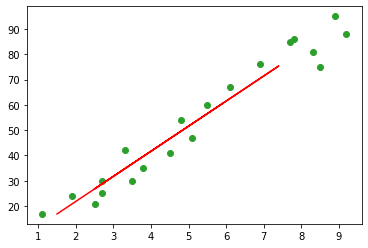

In [144]:
plt.scatter(X_train,y_train,c='#2ca02c')
plt.plot(X_test, ypredict,'r')